# Final Report

- Sandeep Vemulapalli: vvemulap
- Noopur Latkar : nlatkar

Presentation Video Link : https://www.youtube.com/watch?v=4iWmVse99DY 




# Motivation


> YouTube is the world's #1 video sharing website, even more popular than TV. This platform maintains a list of the top trending videos, and releases it publicly on Kaggle. Using a combination of different factors and likability measures like number of views, shares, comments and likes, we would like to find out the secret key that makes a video top-trending, with millions of likes and unmatched popularity. <br><br> There is significant amount of time and budget that goes into making these videos. Not having the right expectations might cause the entire motive to fail, if its doesn't reach the masses or doesn't get accepted by the masses as anticipated. With a lot of buzz around the most liked videos like 'Gangnam Style', 'Despacito' or the most hated video like 'Sadak 2 movie trailer', there is a pattern that sets them apart from the rest of the videos, and analyzing those is important. <br><br> Influencers or content-creators usually spend a lot of money on good significant content, but it's not always as rewarding. <br><br> Performing machine learning on this rich dataset can help us understand what topics are trending in which parts of the world, giving us better insight on what the global society appreciates or disapproves in this time and day.

# Introdcution to the dataset

The dataset we have used for this project is acquired from Kaggle. It consists of top performing videos on the YouTube trending list, updated DAILY. This is what makes the dataset unique, as it is the most latest and updated dataset, perfect for drawing insights and making predictions.<br><br>


https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset <br>
 Columns : 16 <br><br>


The scope of this project is spread over 10 countries, having distinct datasets in csv file format : 
1. India (IN)
> Rows : 115k
2. Unites States (US)
> Rows : 121k
3. Japan (JP)
> Rows : 121k
4. United Kingdom (GB)
> Rows : 121k
5. Germany (DE)
> Rows : 121k
6. Canada (CA)
> Rows : 121k
7. France (FR)
> Rows : 121k
8. Russia (RU)
> Rows : 119k
9. South Korea (KR)
> Rows : 118k
10. Mexico (MX)
> Rows : 120k <br>


Features we have capitalized on -
- Title, Published date, Trending dates : How long has the video been trending since release <br>
- Channel ID, Category, Country code : Domain and genre of the video <br>
- View counts, likes , dislikes, comments : Popularity measures
- Video description : Key word extraction <br>

For the scope of this project, we have focused on the US dataset for prediction mdoelling. We have used the entire dataset for gloabl trend analysis, but not for predictions.

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import os
from pandas.plotting import scatter_matrix
from pandas.core.internals.blocks import check_ndim
import csv
import json
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.linear_model import RANSACRegressor
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler


# Data Source

Load data from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df= pd.read_csv('/content/drive/MyDrive/Data/US_youtube_trending_data.csv')

#Most of numeric features are already in int format
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123591 entries, 0 to 123590
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           123591 non-null  object
 1   title              123591 non-null  object
 2   publishedAt        123591 non-null  object
 3   channelId          123591 non-null  object
 4   channelTitle       123591 non-null  object
 5   categoryId         123591 non-null  int64 
 6   trending_date      123591 non-null  object
 7   tags               123591 non-null  object
 8   view_count         123591 non-null  int64 
 9   likes              123591 non-null  int64 
 10  dislikes           123591 non-null  int64 
 11  comment_count      123591 non-null  int64 
 12  thumbnail_link     123591 non-null  object
 13  comments_disabled  123591 non-null  bool  
 14  ratings_disabled   123591 non-null  bool  
 15  description        120023 non-null  object

In [ ]:
#Numerical Features distribution
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,123591.000000,1.235910e+05,1.235910e+05,123591.000000,1.235910e+05
mean,18.868227,2.697305e+06,1.455322e+05,2466.838564,1.210378e+04
std,6.790303,7.035535e+06,4.101252e+05,11728.243852,8.607888e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,5.195415e+05,2.087700e+04,136.000000,1.480000e+03
50%,20.000000,1.067683e+06,4.995400e+04,562.000000,3.417000e+03
75%,24.000000,2.400232e+06,1.265380e+05,1676.000000,8.290000e+03
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06


# Preprocessing Data

The data has trending videos data of everyday, so same video will have progressive information of it trended over days. To summarize this information single video's data is condensed from last row of the video_id group and the number of days it trended is stored in a new column

In [ ]:


def get_trending_days(df):
  '''
  Takes a data frame groups by video_id and returns summarized data as needed with a new column 'trending days'
  '''
  df_last=df.groupby(['video_id']).last()
  df_count=df.groupby(['video_id']).count()
  df_last['trending_days']=df_count['trending_date']
  df=df_last
  return df

df_update= get_trending_days(df)
df_update.head()

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,trending_days
video_id,,,,,,,,,,,,,,,,
--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10T16:00:00Z,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15T00:00:00Z,Migos|Avalanche|Quality|Control|Music/Motown|R...,6823249,262692,4107,16445,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,10
--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09T23:19:08Z,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15T00:00:00Z,[None],538485,17290,0,1439,https://i.ytimg.com/vi/--2O86Z0hsM/default.jpg,False,False,None,4
--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20T01:03:32Z,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-25T00:00:00Z,[None],682609,8029,369,723,https://i.ytimg.com/vi/--40TEbZ9Is/default.jpg,False,False,Hannah Waddingham wins the Emmy for Supporting...,5
--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07T13:00:00Z,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11T00:00:00Z,retaining wall|New Jersey highway|Direct Conne...,623949,29991,320,998,https://i.ytimg.com/vi/--DKkzWVh-E/default.jpg,False,False,One of the most important (and innocuous) part...,4
--FmExEAsM8,IVE 아이브 'ELEVEN' MV,2021-12-01T09:00:03Z,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,10,2021-12-06T00:00:00Z,Kpop|girl group|1theK|Starshiptv|starship|뮤비|티...,31967789,810589,14252,52092,https://i.ytimg.com/vi/--FmExEAsM8/default.jpg,False,False,IVE Twitter: https://twitter.com/IVEstarship: ...,4


# Histograms

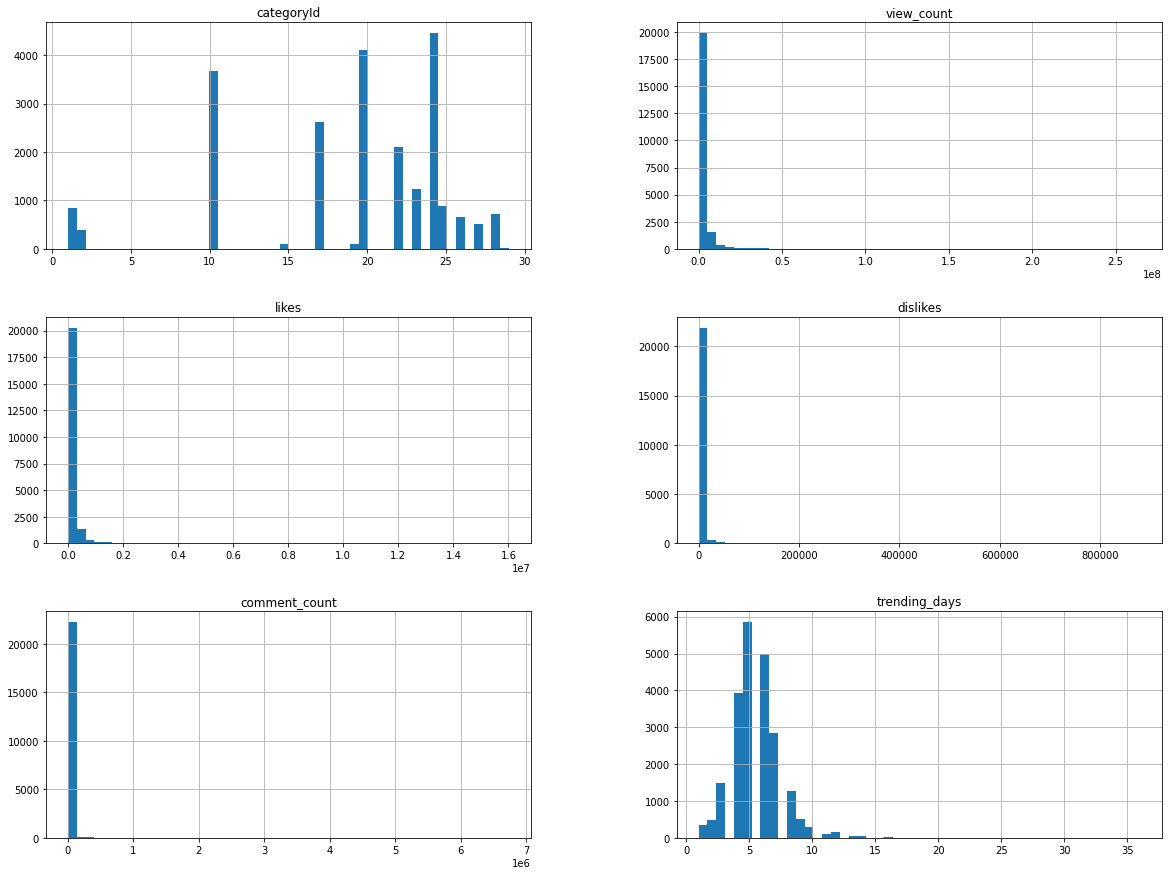

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df_update.hist(bins=50, figsize=(20,15))
plt.show()

- Interpretation: 
- In the first graph, category id 24 spikes, showing maximum trending videos belong to Entertainment category. 
- Trending days are between 1-10 and rarely extend after that, as seen in graph 6.

# Correlation ScatterPLots

Saving figure scatter_matrix_plot


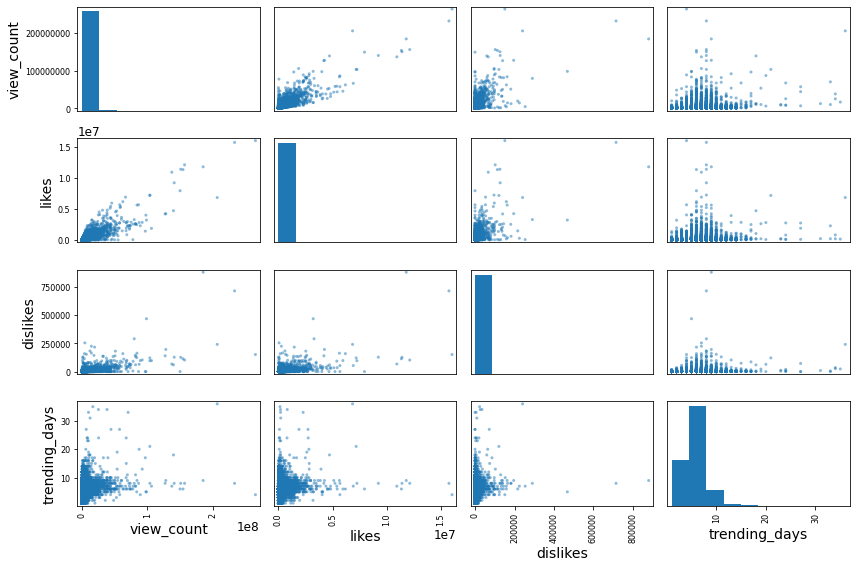

In [ ]:
import numpy as np
import os

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix


attributes = ["view_count", "likes", "dislikes",
              "trending_days"]
scatter_matrix(df_update[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

- Interpretaion: We can see that likes are positively correlated with trending days, while the view count is normally distrbuted over the trending days. Same is the case with likes and trending days. View count is positively correlated to likes.

# ML Pipeline for Baseline models

Since the data is from youtube data api, and is real world data it did not contain many outliers. And moreover virality is all about outliers and removing them can lead to loose some important features.

For pipeline as the views are in order of millions, other features in order of thousands MinMaxScaler was a better choice to normalize the values.

Data did not have any missing values, no imputer is used in the pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler


#Scikit-learn pipeline
num_pipeline = Pipeline([
        ('std_scaler', MinMaxScaler()),

    ])

#Baseline pipeline for Exisitng numerical features
data= num_pipeline.fit_transform(df_update[['view_count','likes', 'dislikes','comment_count']])


In [ ]:
#Method for MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
  '''
  Takes two arrays,calcualtes the mean_absolute_percentage_error and returns it

  '''
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Linear Regression Model**

In [ ]:


#Splitting Train and test
X_train,X_test  = train_test_split(data, test_size=0.1, random_state=42)
Y_train=df_update['trending_days'][:len(X_train)]
test_y=df_update['trending_days'][-len(X_test):]



#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)


Y_predict=lin_reg.predict(X_test)
round_y=Y_predict
round_y=np.around(Y_predict)
lin_mse = mean_squared_error(test_y,round_y)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error: ",lin_rmse)

print("Mean Absolute Error: ", mean_absolute_error(test_y,round_y))
print("MAPE: ",mean_absolute_percentage_error(test_y,round_y))

Root Mean Square Error:  2.0813448620873984
Mean Absolute Error:  1.4327094474153297
MAPE:  34.69262133425392


**Decision Tree Regressor**

In [ ]:
X_train,X_test  = train_test_split(data, test_size=0.1, random_state=42)
Y_train=df_update['trending_days'][:len(X_train)]

test_y=df_update['trending_days'][-len(X_test):]


#Decision Tree

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)
Y_predict = tree_reg.predict(X_test)
round_y=Y_predict
round_y=np.around(Y_predict)
lin_mse = mean_squared_error(test_y,round_y)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error:", lin_rmse)
print("Mean Absolute Error: ", mean_absolute_error(test_y,round_y))

print("MAPE: ",mean_absolute_percentage_error(test_y,round_y))

Root Mean Square Error: 2.909278904353364
Mean Absolute Error:  2.0949197860962565
MAPE:  45.33980958662462


**Random Forest Regressor**

In [ ]:
X_train,X_test  = train_test_split(data, test_size=0.1, random_state=42)
Y_train=df_update['trending_days'][:len(X_train)]
test_y=df_update['trending_days'][-len(X_test):]



#Random Forest Regressor

forest_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
forest_reg.fit(X_train, Y_train)
Y_predict = forest_reg.predict(X_test)
round_y=Y_predict
round_y=np.around(Y_predict)
lin_mse = mean_squared_error(test_y,round_y)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error: ",lin_rmse)
print("Mean Absolute Error: ", mean_absolute_error(test_y,round_y))

print("MAPE: ",mean_absolute_percentage_error(test_y,round_y))

Root Mean Square Error:  2.135244520473086
Mean Absolute Error:  1.4567736185383244
MAPE:  33.40165591227246


#Data Cleaning


In [ ]:
def clean_dataset(dataset):
    
    clean_df = dataset.copy(deep=True)
    
    # Replace NaN in description with space
    clean_df["description"].fillna(" ", inplace=True)
    
    clean_df.loc[clean_df['tags'] == '[None]', 'tags'] = ' '
    # split tags with '|' and convert list to one string
    clean_df['tags'] = [' '.join(tag) for tag in clean_df['tags'].str.split('|')]

    printable = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n'
    # delete non-ASCII and non-English characters
    for text_column in ['title', 'channelTitle', 'description', 'tags']:
        # for all rows in the column apply a filter
        # that only leaves characters from 'printable'
        # since filter does not return a string, then you need to use the join method
        clean_df[text_column] = clean_df[text_column].apply(
            lambda x: ''.join(filter(lambda xi: xi in printable, x)))

    # if there is not a single letter left
    # in the title of the video or in the channel title
    # the video is definitely not in English
    symbols = [c for c in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"]
    clean_df = clean_df[clean_df['title'].str.contains('|'.join(symbols))]
    clean_df = clean_df[clean_df['channelTitle'].str.contains(
        '|'.join(symbols))]

    # rename column to match snake case
    clean_df.rename(columns={'channelTitle': 'channel_title',
                             'publishedAt': 'published_at',
                             'channelId': 'channel_id',
                             'categoryId' : 'category_id'}, inplace=True)
    # delete non-relevant columns
    clean_df.drop(['thumbnail_link'], axis=1, inplace=True)

    clean_df[['comments_disabled', 'ratings_disabled']] *= 1

    clean_df = clean_df.reindex(columns=['title', 'channel_id', 'channel_title',
                                         'published_at', 'category_id', 'trending_date', 'view_count',
                                         'likes', 'dislikes', 'comments_disabled', 'ratings_disabled',
                                         'comment_count', 'tags', 'description','trending_days'])

    clean_df.reset_index(inplace=True)

    return clean_df


df_cleaned=clean_dataset(df_update)
df_cleaned.head()

,video_id,title,channel_id,channel_title,published_at,category_id,trending_date,view_count,likes,dislikes,comments_disabled,ratings_disabled,comment_count,tags,description,trending_days
0,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10T16:00:00Z,10,2021-06-15T00:00:00Z,6823249,262692,4107,0,0,16445,Migos Avalanche Quality Control Music/Motown R...,Watch the the official video for Migos - Avala...,10
1,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,2022-03-09T23:19:08Z,24,2022-03-15T00:00:00Z,538485,17290,0,0,0,1439,,,4
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20T01:03:32Z,24,2021-09-25T00:00:00Z,682609,8029,369,0,0,723,,Hannah Waddingham wins the Emmy for Supporting...,5
3,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07T13:00:00Z,27,2021-12-11T00:00:00Z,623949,29991,320,0,0,998,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,4
4,--FmExEAsM8,IVE 'ELEVEN' MV,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,2021-12-01T09:00:03Z,10,2021-12-06T00:00:00Z,31967789,810589,14252,0,0,52092,Kpop girl group 1theK Starshiptv starship MV...,IVE Twitter: https://twitter.com/IVEstarship: ...,4


# Add Channel Meta Data

Data from Youtube Data API is stored in csv files on drive that is merged with cleaned data 

In [ ]:

def add_channel_data(df,country):
  '''
  given a df and country name- gets the channel information and merges with df
  '''
  fname="/content/drive/MyDrive/Data/"+country+"_channel_data.csv"
  channel_data= pd.read_csv(fname)
  channel_data= channel_data.rename(columns={'id': 'channel_id'})
  channel_data= pd.merge(channel_data, df_cleaned, on='channel_id')
  channel_data=channel_data.dropna()
  print(channel_data.info())
  return channel_data



#Cleaned data with new channel features added as columns
df_cleaned_with_channel_data=add_channel_data(df_cleaned,'US')

print(df_cleaned_with_channel_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22276 entries, 0 to 22421
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22276 non-null  int64  
 1   channel_id         22276 non-null  object 
 2   subscribers        22276 non-null  float64
 3   videos             22276 non-null  float64
 4   views              22276 non-null  float64
 5   video_id           22276 non-null  object 
 6   title              22276 non-null  object 
 7   channel_title      22276 non-null  object 
 8   published_at       22276 non-null  object 
 9   category_id        22276 non-null  int64  
 10  trending_date      22276 non-null  object 
 11  view_count         22276 non-null  int64  
 12  likes              22276 non-null  int64  
 13  dislikes           22276 non-null  int64  
 14  comments_disabled  22276 non-null  int64  
 15  ratings_disabled   22276 non-null  int64  
 16  comment_count      222

# Correaltion with New Data Features

We can see that channel meta data has positive correaltion with trending days as anticipated

In [ ]:
corr_matrix = df_cleaned_with_channel_data.corr()
corr_matrix["trending_days"].sort_values(ascending=False)

trending_days        1.000000
view_count           0.245837
likes                0.181122
dislikes             0.139105
subscribers          0.079215
comment_count        0.069174
views                0.022117
comments_disabled    0.014784
category_id         -0.017612
ratings_disabled    -0.027310
videos              -0.065527
Unnamed: 0          -0.128559
Name: trending_days, dtype: float64

# Pipeline for Models with New Data Features of Channel

In [ ]:
#With New data df and with more columns
data= num_pipeline.fit_transform(df_cleaned_with_channel_data[['subscribers','videos','view_count','likes', 'dislikes','comment_count']])
data.shape

(22276, 6)

**Linear Regression**

In [ ]:
X_train,X_test  = train_test_split(data, test_size=0.1, random_state=42)
X_train[0]

Y_train=df_update['trending_days'][:len(X_train)]

test_y=df_update['trending_days'][-len(X_test):]
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)


Y_predict=lin_reg.predict(X_test)
round_y=Y_predict
round_y=np.around(Y_predict)
lin_mse = mean_squared_error(test_y,round_y)
lin_rmse = np.sqrt(lin_mse)

print("Root Mean Square Error: ",lin_rmse)

print("Mean Absolute Error: ", mean_absolute_error(test_y,round_y))
print("MAPE: ",mean_absolute_percentage_error(test_y,round_y))


Root Mean Square Error:  2.0945985076949856
Mean Absolute Error:  1.4142728904847397
MAPE:  33.7765178491496


**Decision Trees**

In [ ]:
X_train,X_test  = train_test_split(data, test_size=0.1, random_state=42)


Y_train=df_update['trending_days'][:len(X_train)]

test_y=df_update['trending_days'][-len(X_test):]
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)
Y_predict = tree_reg.predict(X_test)
round_y=Y_predict
round_y=np.around(Y_predict)
lin_mse = mean_squared_error(test_y,round_y)
lin_rmse = np.sqrt(lin_mse)


print("Root Mean Square Error: ",lin_rmse)

print("Mean Absolute Error: ", mean_absolute_error(test_y,round_y))
print("MAPE: ",mean_absolute_percentage_error(test_y,round_y))

Root Mean Square Error:  2.991309975252162
Mean Absolute Error:  2.1238779174147218
MAPE:  45.9488411680433


**Random Forests**

In [ ]:
X_train,X_test  = train_test_split(data, test_size=0.1, random_state=42)
X_train[0]

Y_train=df_update['trending_days'][:len(X_train)]

test_y=df_update['trending_days'][-len(X_test):]
forest_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
forest_reg.fit(X_train, Y_train)
Y_predict = forest_reg.predict(X_test)
round_y=Y_predict
round_y=np.around(Y_predict)
lin_mse = mean_squared_error(test_y,round_y)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error: ",lin_rmse)
print("Mean Absolute Error: ", mean_absolute_error(test_y,round_y))

print("MAPE: ",mean_absolute_percentage_error(test_y,round_y))

Root Mean Square Error:  2.0928835562190935
Mean Absolute Error:  1.4259425493716338
MAPE:  32.933510492452825


**MLP Regression**

In [ ]:
#Data Set class to convert to tensors as needed
class Dataset(torch.utils.data.Dataset):


  def __init__(self, X, y):#scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      
      self.X = torch.from_numpy(X)

      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [ ]:
#MLP Class for building a nueral network architecture
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(6, 256),
      nn.LeakyReLU(),
      nn.Linear(256, 512),
      nn.LeakyReLU(),
      nn.Dropout(0.15),
      nn.Linear(512, 512),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(512, 512),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(512,256),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(256,128),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(128,64),
      nn.LeakyReLU(),
      nn.Linear(64,32),
      nn.LeakyReLU(),
      nn.Linear(32,1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
# Set fixed random number seed
torch.manual_seed(42)
  


#Loading the dataset into model
X, y = X_train,df_cleaned_with_channel_data['trending_days'][:len(X_train)].values

In [ ]:
dataset = Dataset(X, y)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=25000, shuffle=True, num_workers=1)

# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01,weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 2,factor=0.5,threshold=0.5)



In [ ]:
  # Run the training loop
  
  for epoch in range(0, 20):
  
  # Print epoch
    print(f'Starting epoch {epoch+1}')
    print("learning rate",optimizer.param_groups[0]['lr'])
    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      
    print("loss: ",current_loss)
    scheduler.step(current_loss)

# Process is complete.
print('Training process has finished.')

Starting epoch 1
learning rate 0.01


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  36.357200622558594
Starting epoch 2
learning rate 0.01


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  33.26816940307617
Starting epoch 3
learning rate 0.01


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  44.581573486328125
Starting epoch 4
learning rate 0.01


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  30.319311141967773
Starting epoch 5
learning rate 0.005


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  34.97384262084961
Starting epoch 6
learning rate 0.005


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  35.09063720703125
Starting epoch 7
learning rate 0.005


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  34.986061096191406
Starting epoch 8
learning rate 0.0025


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  34.28743362426758
Starting epoch 9
learning rate 0.0025


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  30.759876251220703
Starting epoch 10
learning rate 0.0025


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  22.45916175842285
Starting epoch 11
learning rate 0.00125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  8.780150413513184
Starting epoch 12
learning rate 0.00125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  4.588399410247803
Starting epoch 13
learning rate 0.00125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  10.977788925170898
Starting epoch 14
learning rate 0.00125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  8.943445205688477
Starting epoch 15
learning rate 0.000625


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  5.095945358276367
Starting epoch 16
learning rate 0.000625


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  4.6021199226379395
Starting epoch 17
learning rate 0.000625


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  4.869426250457764
Starting epoch 18
learning rate 0.0003125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  5.391117095947266
Starting epoch 19
learning rate 0.0003125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  5.621448993682861
Starting epoch 20
learning rate 0.0003125


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2411b94950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


loss:  5.720356464385986
Training process has finished.


In [ ]:
test=torch.from_numpy(X_test)
print(test.shape)
preds=mlp(test.float())


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

round_y=np.around(preds.detach().numpy())
unique, counts = np.unique(round_y, return_counts=True)

#print (np.asarray((unique, counts)).T)
print("MAPE: ",mean_absolute_percentage_error(df_cleaned_with_channel_data['trending_days'][len(X_train):].values,round_y)

torch.Size([2228, 6])
[[3.000e+00 7.400e+01]
 [4.000e+00 1.039e+03]
 [5.000e+00 1.027e+03]
 [6.000e+00 8.700e+01]
 [7.000e+00 1.000e+00]]


28.761401675557913

# Keyword Extraction from Description Feature

In [ ]:
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')

person_dict=Counter()
org_dict=Counter()
norp_dict=Counter()
date_dict=Counter()

for id,text in clean_df.iterrows():
  if text['description']!=None:
    person_dict[text['video_id']] = []
    org_dict[text['video_id']] = []
    norp_dict[text['video_id']] = []
    date_dict[text['video_id']] = []
    parsed_text = nlp(text['description'])

    for entity in parsed_text.ents:

        if(entity.label_ == 'PERSON'):
            person_dict[text['video_id']].append(entity.orth_)
        elif(entity.label_ == 'ORG'):
            org_dict[text['video_id']].append(entity.orth_)
        elif(entity.label_ == 'NORP'):
            norp_dict[text['video_id']].append(entity.orth_)
        elif(entity.label_ == 'DATE'):
            date_dict[text['video_id']].append(entity.orth_)

In [ ]:
import json
with open('us_person_data.json', 'w') as fp:
    json.dump(person_dict, fp,  indent=4)
with open('org_data.json', 'w') as fp:
    json.dump(org_dict, fp,  indent=4)
with open('norp_data.json', 'w') as fp:
    json.dump(norp_dict, fp,  indent=4)
with open('date_data.json', 'w') as fp:
    json.dump(date_dict, fp,  indent=4)

# Popularity from Video Description as a new feature

Loading processed popularity metrics of all videos, and persons in the dataset

In [ ]:
f = open('/content/us_person_data.json','r')
video_dict=json.load(f)

print(len(video_dict))
f = open('/content/popularity_score.json','r')
person_scores=json.load(f)

22422


In [ ]:
#calculating video_based total popularity score based on the person's involved in the video

video_popularity_df=pd.DataFrame(columns=['video_id','popularity'])

from collections import defaultdict
video_popularity_scores=defaultdict(lambda : 0)


for i in video_dict.keys():
  if len(video_dict[i])>0:
    for j in video_dict[i]:
      video_popularity_scores[i]+=person_scores[j]
    video_popularity_scores[i]/=len(video_dict[i])
    video_popularity_df=video_popularity_df.append({'video_id':i,'popularity':video_popularity_scores[i]},ignore_index=True)




In [ ]:

def add_video_popaularity(df,popularity_df):
  '''
  given parent df adds popularity score based on the video_id
  '''
  
  new = df.merge(popularity_df,on='video_id',how='inner')
  return new


df_with_popularity=add_video_popaularity(df_cleaned_with_channel_data,video_popularity_df)


In [ ]:
df_with_popularity

,Unnamed: 0,channel_id,subscribers,videos,views,video_id,title,channel_title,published_at,category_id,...,view_count,likes,dislikes,comments_disabled,ratings_disabled,comment_count,tags,description,trending_days,popularity
0,0,UCvtRTOMP2TqYqu51xNrqAzg,5450000.0,1747.0,1.601150e+09,FxRCyFSq1nI,DATING Sommer Ray for 24 Hours!!,Brawadis,2020-09-13T16:00:58Z,22,...,3242089,246765,4200,0,0,31727,brawadis prank basketball skits ghost funny vi...,SUBSCRIBE to BRAWADIS http://bit.ly/Subscribe...,6,3242089.0
1,1,UC0ZV6M2THA81QT9hrVWJG3A,2600000.0,131.0,4.520446e+08,1R559DWBYbU,Apex Legends: Escape Launch Trailer,Apex Legends,2021-10-21T15:00:10Z,20,...,4577633,255764,2513,0,0,16236,Apex Legends apex Apex Legends characters new ...,The Legends are taking a vacation and theyre r...,6,2978927.5
2,1,UC0ZV6M2THA81QT9hrVWJG3A,2600000.0,131.0,4.520446e+08,5OUu_p16oe0,Apex Legends Warriors Collection Event,Apex Legends,2022-03-24T15:00:03Z,20,...,2132188,59824,0,0,0,3375,apex legends apex apex warriors apex legends w...,The fight never stops for our Legends: prove y...,7,2311597.2
3,1,UC0ZV6M2THA81QT9hrVWJG3A,2600000.0,131.0,4.520446e+08,5meAIPs-n90,Apex Legends Season 7 Battle Pass Trailer,Apex Legends,2020-11-04T16:00:00Z,20,...,1795610,88293,1833,0,0,8384,Apex Legends Apex Legends characters new Apex ...,Grab the Battle Pass and complete challenges t...,9,2240849.0
4,1,UC0ZV6M2THA81QT9hrVWJG3A,2600000.0,131.0,4.520446e+08,8IBg0D5aUhs,Apex Legends Monsters Within Event,Apex Legends,2021-10-07T15:00:04Z,20,...,1742529,91985,1534,0,0,4829,Apex Legends Apex Legends characters new Apex ...,Its everyones favorite time of year: nights gr...,6,3319348.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16331,5545,UCMt7QccSCUZgp-qrLLYVybA,104000.0,27.0,7.386847e+06,Iive89fPe6I,Crazy Roblox Bedwars Facts You Didn't Know,CubeINC,2022-04-14T20:00:12Z,22,...,451554,14989,0,0,0,1568,roblox bedwars roblox bed wars roblox roblox b...,Crazy Roblox Bedwars Facts You Didn't KnowRobl...,2,451554.0
16332,5547,UCDb0peSmF5rLX7BvuTcJfCw,584000.0,991.0,2.311369e+08,a9tq0aS5Zu8,Demon Slayer: Kimetsu no Yaiba Swordsmith Vill...,Aniplex USA,2022-04-16T09:29:10Z,1,...,2162513,176606,0,0,0,5702,,A new mission is about to begin within the Swo...,1,1823573.1
16333,5548,UCXw1ddyrUmib3zmCmvSI1ow,790000.0,101.0,7.509262e+07,DVqdF4tScVs,McDonalds Pakistan VS India!! Epic Fast Food S...,More Best Ever Food Review Show,2022-04-16T12:30:07Z,19,...,786382,17119,0,0,0,2213,,WATCH OUR MAIN CHANNEL http://bit.ly/BestEv...,1,786382.0
16334,5549,UCZmIVgXi4Cv82se7-xsoZAw,927000.0,498.0,1.842986e+08,IlEaA85bt60,Opening MECHA POKEMON PACKS to get GOD POKEMON...,BeckBroPlays,2022-04-15T23:58:06Z,20,...,475058,25556,0,0,0,622,Minecraft Pixelmon Legendary Upgrading God Evo...,Opening MECHA POKEMON PACKS to get GOD POKEMON...,1,475058.0


# Pipeline for Data with popularity score added

Making Data ready for the MLP Regressor with new data feature

In [ ]:

data= num_pipeline.fit_transform(df_with_popularity[['subscribers','videos','view_count','likes', 'dislikes','comment_count','popularity']])
data.shape


X_train,X_test  = train_test_split(data, test_size=0.05, random_state=42)


Y_train=df_with_popularity['trending_days'][:len(X_train)]

test_y=df_with_popularity['trending_days'][-len(X_test):]

In [ ]:
# num_attribs = list(df_with_popularity[['subscribers','videos','videos','view_count','likes', 'dislikes','comment_count','popularity']])
# cat_attribs = ["category_id"]

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

# data = full_pipeline.fit_transform(df_with_popularity)

**MLP Dataset class and MLP class**

In [ ]:
class Dataset(torch.utils.data.Dataset):


  def __init__(self, X, y):#scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      
      self.X = torch.from_numpy(X)

      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(7, 256),
      nn.LeakyReLU(),
      nn.Linear(256, 512),
      nn.LeakyReLU(),
      nn.Dropout(0.15),
      nn.Linear(512, 512),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(512, 512),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(512,256),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(256,128),
      nn.LeakyReLU(),
       nn.Dropout(0.15),
      nn.Linear(128,64),
      nn.LeakyReLU(),
      nn.Linear(64,32),
      nn.LeakyReLU(),
      nn.Linear(32,1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
# Set fixed random number seed
torch.manual_seed(42)
  
  # Load Boston dataset


X, y = X_train,df_with_popularity['trending_days'][:len(X_train)].values

In [ ]:
dataset = Dataset(X, y)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=25000, shuffle=True, num_workers=1)

  # Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01,weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 2,factor=0.5,threshold=0.4)



In [ ]:
  # Run the training loop
  
  for epoch in range(0, 50):
  
  # Print epoch
    print(f'Starting epoch {epoch+1}')
    print("learning rate",optimizer.param_groups[0]['lr'])
    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      
    print("loss: ",current_loss)
    scheduler.step(current_loss)

# Process is complete.
print('Training process has finished.')

Starting epoch 1
learning rate 0.01
loss:  34.956478118896484
Starting epoch 2
learning rate 0.01
loss:  29.496458053588867
Starting epoch 3
learning rate 0.01
loss:  212.88134765625
Starting epoch 4
learning rate 0.01
loss:  24.62409782409668
Starting epoch 5
learning rate 0.005
loss:  33.42472839355469
Starting epoch 6
learning rate 0.005
loss:  33.67208480834961
Starting epoch 7
learning rate 0.005
loss:  33.60267639160156
Starting epoch 8
learning rate 0.0025
loss:  31.172592163085938
Starting epoch 9
learning rate 0.0025
loss:  26.284523010253906
Starting epoch 10
learning rate 0.0025
loss:  15.593584060668945
Starting epoch 11
learning rate 0.0025
loss:  4.744135856628418
Starting epoch 12
learning rate 0.0025
loss:  28.687694549560547
Starting epoch 13
learning rate 0.0025
loss:  7.22743558883667
Starting epoch 14
learning rate 0.0025
loss:  6.197632789611816
Starting epoch 15
learning rate 0.00125
loss:  11.811787605285645
Starting epoch 16
learning rate 0.00125
loss:  13.63394

In [ ]:
test=torch.from_numpy(X_test)
print(test.shape)
preds=mlp(test.float())

  
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

round_y=np.around(preds.detach().numpy())
unique, counts = np.unique(round_y, return_counts=True)

print (np.asarray((unique, counts)).T)
print("MAPE: ",mean_absolute_percentage_error(df_with_popularity['trending_days'][len(X_train):].values,round_y))

torch.Size([817, 7])
[[  3.  39.]
 [  4. 461.]
 [  5. 304.]
 [  6.  13.]]
MAPE:  28.15800409828177


Accuracy has reduced to 28.16% which is the best we have obtained so far. We will predict our test values based on this model.

# Predict Functionality for Content Creators



In [ ]:

#method to calculate the person based popularity scores from historical data
def get_popularity(names):
  '''
  Takes a list of names and calculates the popularity scores from it
  '''
  score=0

  #For each name in list adding score
  for i in names:
    score+=person_scores[i]
  
  if len(names)==0:
    return 0

  return score/len(names)



def predict_from_user(channelid,names,data_df):
  '''
  Predicts trending days given a channel id, list of persons involved and historical data
  returns trending days as numpy value
  '''

  #getting channel data df
  channels=pd.read_csv("/content/drive/MyDrive/Data/US_channel_data.csv")

  arr=[]
  #['subscribers','videos','view_count','likes', 'dislikes','comment_count','popularity']

  #getting subrscriber and videos information of channel

  #print(channels[channels['id']==channelid])
  arr.append(channels[channels['id']==channelid]['subscribers'].values[0])
  arr.append(channels[channels['id']==channelid]['videos'].values[0])

  #calulating typical view_count, likes, dislikes and comments for that channel
  channel_info=data_df.groupby('channelId').mean()
  #print(channel_info)
  arr.append(channel_info[channel_info.index==channelid]['view_count'].values[0])
  arr.append(channel_info[channel_info.index==channelid]['likes'].values[0])
  arr.append(channel_info[channel_info.index==channelid]['dislikes'].values[0])
  arr.append(channel_info[channel_info.index==channelid]['comment_count'].values[0])
  
  


  
  #Getting popularity score based on the person's involved
  test=arr.copy()
  test.append(get_popularity(names))
  #print(test)
  print("predicted views based on people: ",(get_popularity(names)))
  test=np.array(test)
  test=torch.from_numpy(test)

  #passsing data thorugh pipeline two scale
  test=num_pipeline.fit_transform(test.reshape(1,-1))


  #predicting from the model
  preds=mlp(torch.from_numpy(test).float())
  return np.around(preds.detach().numpy())


In [ ]:
predict_from_user('UCvtRTOMP2TqYqu51xNrqAzg',['Tom'],df_update)[0][0]

predicted views based on people:  5618666.0


4.0

In [ ]:
predict_from_user('UCvtRTOMP2TqYqu51xNrqAzg',['Lewis Hamilton','Camila Cabello'],df_update)

predicted views based on people:  2668793.0


array([[4.]], dtype=float32)

In [ ]:
predict_from_user('UCvtRTOMP2TqYqu51xNrqAzg',['Will Smiths','Camila Cabello'],df_update)

predicted views based on people:  3203269.0


array([[5.]], dtype=float32)

- Interpretation:
- The combination of Camila Cabello and Lewis Hamilton realesed on particular channel ID will garner 2.6 million views and will trend for 4 days.
- If we replace Lewis Hamilton with Will Smith, the new combination featured ina video garners 3.2 million, and will trend for 5 days.
- The second alternative is more beneficial for business from the content creator's point of view. 

# Country Wise Top Categories Analysis

In [ ]:
import csv
import json
from collections import Counter

def category_names(country_code):
  path = '/content/drive/MyDrive//Data/'

  with open (path + country_code + '_category_id.json',"r") as f:
    df_category_info = json.load(f)

  categories = Counter()

  for item in df_category_info['items']:
    a = item['id']
    for k,v in item['snippet'].items():
      if(k=='title'):
        categories[a] = v
  d = {int(k):v for k,v in categories.items()}
  categories = {k: v for k, v in sorted(list(d.items()))}
  return categories

In [ ]:
def n_categories(country_code):
  df = pd.read_csv('/content/drive/MyDrive/Data/'+country_code+'_youtube_trending_data.csv')
  new = df['categoryId'].value_counts()[:3].index
  top_categories = new.tolist()
  cat_names = category_names(country_code)
  top_category_names = [v for k,v in cat_names.items() for t in top_categories if t==k]
  return top_category_names

In [ ]:
country_codes = ['US','IN','CA','JP','GB','DE','FR','RU','MX','KR']

In [ ]:
import pandas as pd
cat = Counter()
for c in country_codes:
  print(c)
  print(n_categories(c))
  print()

US
['Music', 'Gaming', 'Entertainment']

IN
['Music', 'People & Blogs', 'Entertainment']

CA
['Music', 'Gaming', 'Entertainment']

JP
['Gaming', 'People & Blogs', 'Entertainment']

GB
['Sports', 'Gaming', 'Entertainment']

DE
['Music', 'People & Blogs', 'Entertainment']

FR
['Music', 'Gaming', 'Entertainment']

RU
['People & Blogs', 'Entertainment', 'News & Politics']

MX
['Music', 'People & Blogs', 'Entertainment']

KR
['Music', 'People & Blogs', 'Entertainment']



- Interpretation:
- The 'Entertainment' genre of videos is trending across almost all countries among the 10 we are considering as a part of this dataset. 
- Japan encourages 'Gaming' genre.
- Music is popular in Canada and India.